Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('/content/data.csv')

1. Data collection
2. Data Cleaning
3. Data Wrangling
4. Data Analysis
5. Data Visualiazation
6. Data Prediction


In [ ]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
df.shape

(25, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [ ]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [ ]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Text(0.5, 1.0, 'Plotting the regression line')

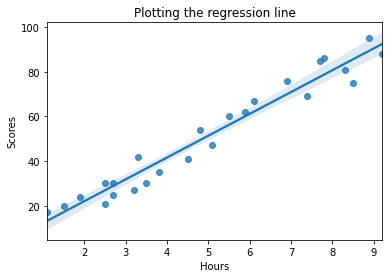

In [ ]:
sns.regplot(x="Hours", y="Scores", data=df)
plt.title("Plotting the regression line")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AttributeError: ignored

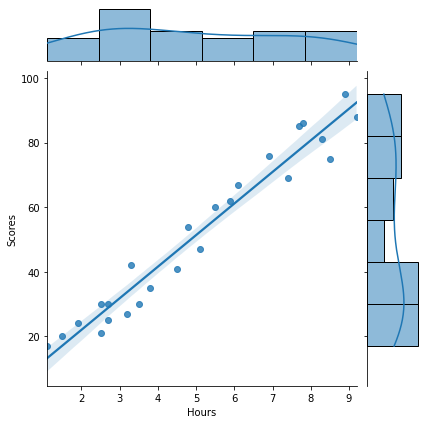

In [ ]:
sns.jointplot(df['Hours'], df['Scores'], kind = "reg").annotate(stats.pearsonr)
plt.show()

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

Training Phase

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_prediction = regressor.predict(X_test)

In [ ]:
y_prediction

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted_Score': y_prediction})  
df1

,Actual,Predicted_Score
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [ ]:
#df=pd.DataFrame({'Scores': y, 'Res':"Fail"})
cut_off = 40
df['Res']=df['Scores']>= 40
#del df['RES']
df

,Hours,Scores,Res
0,2.5,21,False
1,5.1,47,True
2,3.2,27,False
3,8.5,75,True
4,3.5,30,False
5,1.5,20,False
6,9.2,88,True
7,5.5,60,True
8,8.3,81,True
9,2.7,25,False


In [ ]:
conditions =[
              (df['Scores'] >= 40),
              (df['Scores']<40)
            ]

# create a list of the values we want to assign for each condition
values = ['Pass', 'Fail']

# create a new column and use np.select to assign values to it using our lists as arguments
df['RES'] = np.select(conditions, values)
del df['Res']
df

,Hours,Scores,RES
0,2.5,21,Fail
1,5.1,47,Pass
2,3.2,27,Fail
3,8.5,75,Pass
4,3.5,30,Fail
5,1.5,20,Fail
6,9.2,88,Pass
7,5.5,60,Pass
8,8.3,81,Pass
9,2.7,25,Fail


In [ ]:
df.head(8)

,Hours,Scores,RES
0,2.5,21,Fail
1,5.1,47,Pass
2,3.2,27,Fail
3,8.5,75,Pass
4,3.5,30,Fail
5,1.5,20,Fail
6,9.2,88,Pass
7,5.5,60,Pass


In [ ]:
r2_score = regressor.score(X_test,y_test)
print(r2_score*100,'%')

95.68211104435257 %


In [ ]:
#value of b0
print('intercept:', regressor.intercept_)
#value of b1
print('slope:', regressor.coef_)

intercept: 2.3708153823418883
slope: [9.78856669]
